# Exercise 02

Estimate a classifier to predict churn

## Problem Formulation

Customer Churn: losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

## Data

Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.

In [120]:
# Download the dataset
from urllib import request

response = request.urlopen('https://raw.githubusercontent.com/EricChiang/churn/master/data/churn.csv')
raw_data = response.read().decode('utf-8')

In [99]:
# Convert to numpy
import numpy as np
data = []
for line in raw_data.splitlines()[1:]:
    words = line.split(',')
    data.append(words)
data = np.array(data)
column_names = raw_data.splitlines()[0].split(',')
n_obs = data.shape[0]
n_obs

3333

In [100]:
print(column_names)
print(data.shape)

['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']
(3333, 21)


In [101]:
data[:2]

array([['KS', '128', '415', '382-4657', 'no', 'yes', '25', '265.100000',
        '110', '45.070000', '197.400000', '99', '16.780000', '244.700000',
        '91', '11.010000', '10.000000', '3', '2.700000', '1', 'False.'],
       ['OH', '107', '415', '371-7191', 'no', 'yes', '26', '161.600000',
        '123', '27.470000', '195.500000', '103', '16.620000', '254.400000',
        '103', '11.450000', '13.700000', '3', '3.700000', '1', 'False.']], 
      dtype='<U10')

In [102]:
# Select only the numeric features
X = data[:, [1,2,6,7,8,9,10]].astype(np.float)
# Convert bools to floats
X_ = (data[:, [4,5]] == 'no').astype(np.float)
X = np.hstack((X, X_))
Y = (data[:, -1] == 'True.').astype(np.int)

In [103]:
X[:2]

array([[ 128.  ,  415.  ,   25.  ,  265.1 ,  110.  ,   45.07,  197.4 ,
           1.  ,    0.  ],
       [ 107.  ,  415.  ,   26.  ,  161.6 ,  123.  ,   27.47,  195.5 ,
           1.  ,    0.  ]])

In [104]:
print('Number of churn cases ', Y.sum())

Number of churn cases  483


# Exercise 02.1

Split the training set in two sets with 70% and 30% of the data, respectively.

---
Partir la base de datos es dos partes de 70%

In [110]:
X_70=X[0:2332,]
Y_70=Y[0:2332,]

X_30=X[2332:,]
Y_30=Y[2332:,]

# Insert code here


# Exercise 02.2

Train a logistic regression using the 70% set

---
Entrenar una regresion logistica usando la particion del 70%

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

clf = linear_model.LogisticRegression()
clf.fit(X_70,Y_70)
print(clf.coef_)
print(clf.intercept_)




[[ -6.24e-04  -2.44e-03  -1.40e-02   1.19e-02  -7.66e-04  -1.28e-02
    4.49e-03  -1.81e+00   4.54e-01]]
[-2.15]


In [112]:
y_pred = clf.predict(X_70)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

# Exercise 02.3

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set

---
a) Estimar la matriz de confusion en la base del  30%.

b) Calcular el poder de prediccion usando la 

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

clf = linear_model.LogisticRegression()
clf.fit(X_30,Y_30)
print(clf.coef_)
print(clf.intercept_)

[[  7.65e-04  -5.27e-03   1.60e-03   1.05e-02   6.57e-04   1.01e-02
    5.38e-03  -1.85e+00   6.29e-01]]
[-1.78]


In [115]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_30)
cm = confusion_matrix(Y_30, y_pred)
np.set_printoptions(precision=2)
print(cm)



[[814  18]
 [144  25]]


In [129]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['b', 'r', 'g'])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

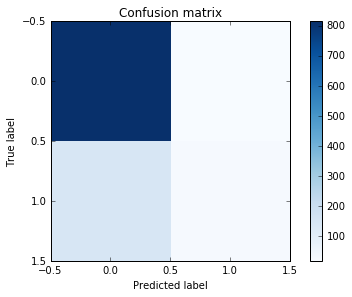

In [130]:
plt.figure()
plot_confusion_matrix(cm)

In [116]:
from sklearn.linear_model import LogisticRegression

from sklearn import cross_validation

errors=[]
n_samples=Y_30.shape
acc = (y_pred == Y_30).sum()
err = 1- acc / n_samples
errors.append(err)

errors = np.array(errors)
print(errors.mean())

0.161838161838
